In [118]:
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from scipy.sparse import hstack

file_path = 'data/english_video_data.csv'
videos_df = pd.read_csv(file_path)
videos_df.head()

,c_channel_id,v_video_id,v_date_publishedAt,v_time_publishedAt,c_channel_title,c_channel_upload_playlist,c_channel_subCount,c_channel_videoCount,c_channel_viewCount,v_category_id,...,v_comment_count,v_likes,v_favorites,v_views,v_definition,v_duration,v_caption,v_age_restricted,v_privacy_status,v_made_for_kids
0,UC295-Dw_tDNtZXFeAPAW6Aw,oGga7hZypCs,2024-09-02,11:00:48,5-Minute Crafts,UU295-Dw_tDNtZXFeAPAW6Aw,81100000,7445,27960945663,26,...,28,442,0,76602,hd,2:03:35,False,Not Restricted,public,False
1,UC295-Dw_tDNtZXFeAPAW6Aw,pkzIiXkRxB0,2024-08-30,11:00:54,5-Minute Crafts,UU295-Dw_tDNtZXFeAPAW6Aw,81100000,7445,27960945663,26,...,21,1165,0,341133,hd,2:01:48,False,Not Restricted,public,False
2,UC295-Dw_tDNtZXFeAPAW6Aw,TUS8vZaHNds,2024-08-31,11:00:26,5-Minute Crafts,UU295-Dw_tDNtZXFeAPAW6Aw,81100000,7445,27960945663,26,...,43,1374,0,222425,hd,1:00:04,False,Not Restricted,public,False
3,UC295-Dw_tDNtZXFeAPAW6Aw,rBzKTkUG3Wk,2024-08-31,13:00:57,5-Minute Crafts,UU295-Dw_tDNtZXFeAPAW6Aw,81100000,7445,27960945663,26,...,19,274,0,40821,hd,1:01:09,False,Not Restricted,public,False
4,UC295-Dw_tDNtZXFeAPAW6Aw,XHQP6mut8YI,2024-09-01,11:00:36,5-Minute Crafts,UU295-Dw_tDNtZXFeAPAW6Aw,81100000,7445,27960945663,26,...,27,485,0,82374,hd,0:20:16,False,Not Restricted,public,False


In [119]:
videos_df['v_description'] = videos_df['v_description'].fillna("")

In [120]:
# def remove_urls(description):
#     clean_text = re.sub(r"http\S+|www\S+|https\S+", "", description, flags=re.MULTILINE)
#     clean_text = re.sub(rf"\b{re.escape('video')}\b", "", clean_text, flags=re.IGNORECASE)
#     clean_text = re.sub(rf"\b{re.escape('channel')}\b", "", clean_text, flags=re.IGNORECASE)
#     return clean_text

In [121]:
# vectorizer = CountVectorizer(stop_words='english', preprocessor=remove_urls, ngram_range=(1,1))

# vectors = vectorizer.fit_transform(videos_df['v_tags'].loc[videos_df['c_channel_subCount'] > 1000000])
# word_counts = vectors.sum(axis=0)


# word_freq = pd.DataFrame({
#     'word': vectorizer.get_feature_names_out(),
#     'count': word_counts.A1
# })

# word_freq = word_freq.sort_values(by='count', ascending=False)

# word_freq.head(20)

In [122]:
videos_df_2 = videos_df.drop(['v_favorites','v_privacy_status','c_channel_id','v_video_id','c_channel_upload_playlist','v_description'], axis=1)

In [123]:
videos_df_2.dtypes

v_date_publishedAt      object
v_time_publishedAt      object
c_channel_title         object
c_channel_subCount       int64
c_channel_videoCount     int64
c_channel_viewCount      int64
v_category_id            int64
v_tags                  object
v_title                 object
v_comment_count          int64
v_likes                  int64
v_views                  int64
v_definition            object
v_duration              object
v_caption                 bool
v_age_restricted        object
v_made_for_kids           bool
dtype: object

In [124]:
videos_df_2['v_date_publishedAt'] = videos_df_2['v_date_publishedAt'].astype('datetime64[s]')
videos_df_2['v_time_publishedAt'] = videos_df_2['v_time_publishedAt'].astype('datetime64[s]')

videos_df_2['v_year'] = videos_df_2['v_date_publishedAt'].dt.year
videos_df_2['v_month'] = videos_df_2['v_date_publishedAt'].dt.month
videos_df_2['v_day'] = videos_df_2['v_date_publishedAt'].dt.day
videos_df_2['v_hour'] = videos_df_2['v_time_publishedAt'].dt.hour
videos_df_2['v_minute'] = videos_df_2['v_time_publishedAt'].dt.minute
videos_df_2['v_second'] = videos_df_2['v_time_publishedAt'].dt.second

videos_df_2.drop(['v_date_publishedAt', 'v_time_publishedAt'], axis=1, inplace=True)

videos_df_2['v_duration_time'] = pd.to_timedelta(videos_df_2['v_duration'])

videos_df_2['v_duration_time'] = videos_df_2['v_duration_time'].dt.total_seconds()

videos_df_2.drop(['v_duration'], axis=1, inplace=True)

In [125]:
videos_df_2.dtypes

c_channel_title          object
c_channel_subCount        int64
c_channel_videoCount      int64
c_channel_viewCount       int64
v_category_id             int64
v_tags                   object
v_title                  object
v_comment_count           int64
v_likes                   int64
v_views                   int64
v_definition             object
v_caption                  bool
v_age_restricted         object
v_made_for_kids            bool
v_year                    int32
v_month                   int32
v_day                     int32
v_hour                    int32
v_minute                  int32
v_second                  int32
v_duration_time         float64
dtype: object

In [126]:
videos_df_2

,c_channel_title,c_channel_subCount,c_channel_videoCount,c_channel_viewCount,v_category_id,v_tags,v_title,v_comment_count,v_likes,v_views,...,v_caption,v_age_restricted,v_made_for_kids,v_year,v_month,v_day,v_hour,v_minute,v_second,v_duration_time
0,5-Minute Crafts,81100000,7445,27960945663,26,"['5 minute craft', '5 minutes craft', '5-minut...",BRILLIANT LIFE HACKS 🌟💙 COOL DOLL REUSE,28,442,76602,...,False,Not Restricted,False,2024,9,2,11,0,48,7415.0
1,5-Minute Crafts,81100000,7445,27960945663,26,"['5 minute craft', '5 minutes craft', '5-minut...",SECRET SMART COOKING HACKS THAT CHANGE EVERYTH...,21,1165,341133,...,False,Not Restricted,False,2024,8,30,11,0,54,7308.0
2,5-Minute Crafts,81100000,7445,27960945663,26,"['5 minute craft', '5 minutes craft', '5-minut...",INCREDIBLE RAINBOW IDEAS 🌈 Creative Room Makeo...,43,1374,222425,...,False,Not Restricted,False,2024,8,31,11,0,26,3604.0
3,5-Minute Crafts,81100000,7445,27960945663,26,"['5 minute craft', '5 minutes craft', '5-minut...",BOOST YOUR GPA WITH THESE EPIC SCHOOL HACKS & ...,19,274,40821,...,False,Not Restricted,False,2024,8,31,13,0,57,3669.0
4,5-Minute Crafts,81100000,7445,27960945663,26,"['5 minute craft', '5 minutes craft', '5-minut...",FROM DULL TO STUNNING CLOTHES | MUST-SEE CLOTH...,27,485,82374,...,False,Not Restricted,False,2024,9,1,11,0,36,1216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22511,Diy Craft and Art ideas 💫,12,11,1906,22,"['diy', 'YouTube shorts', 'handmade', 'painting']",Diy painting ideas #youtubeshorts #artist,0,11,413,...,False,Not Restricted,False,2024,7,18,13,54,19,32.0
22512,Diy Craft and Art ideas 💫,12,11,1906,22,"['cute painting', 'shorts', 'viral', 'top pain...",Little chettah heart 💜 #diy,0,4,12,...,False,Not Restricted,False,2024,8,12,13,59,4,15.0
22513,Diy Craft and Art ideas 💫,12,11,1906,22,"['diy', 'cute painting ideas', 'handmade', 'ca...",Cute painting 🎨 #shorts,0,4,20,...,False,Not Restricted,False,2024,8,12,4,18,37,8.0
22514,Eve diy and arts,5,2,215,22,[],Drawing Kurdistan flag #shorts #edit #viralvideo,0,7,98,...,False,Not Restricted,False,2024,12,6,15,31,20,12.0


In [127]:
categories = {
    1: "Film & Animation",
    2: "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    18: "Short Movies",
    19: "Travel & Events",
    20: "Gaming",
    21: "Videoblogging",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "Howto & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism",
    30: "Movies",
    31: "Anime/Animation",
    32: "Action/Adventure",
    33: "Classics",
    34: "Comedy",
    35: "Documentary",
    36: "Drama",
    37: "Family",
    38: "Foreign",
    39: "Horror",
    40: "Sci-Fi/Fantasy",
    41: "Thriller",
    42: "Shorts",
    43: "Shows",
    44: "Trailers"
}

In [128]:
def name_categories(df, category_dict):
    for index, row in df.iterrows():
        if row['v_category_id'] in [23, 10, 17, 15, 19]:
            df.at[index, 'v_category_id'] = "other"
        elif row['v_category_id'] in category_dict:
            df.at[index, 'v_category_id'] = category_dict[row['v_category_id']]

    return df

In [129]:
videos_df_cats = name_categories(videos_df_2, categories)

C:\Users\amy_d\AppData\Local\Temp\ipykernel_19900\1216091322.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Howto & Style' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[index, 'v_category_id'] = category_dict[row['v_category_id']]


In [130]:
videos_df_cats = videos_df_cats.sample(frac=1, random_state=42).reset_index(drop=True)

In [131]:
videos_df_cats.columns

Index(['c_channel_title', 'c_channel_subCount', 'c_channel_videoCount',
       'c_channel_viewCount', 'v_category_id', 'v_tags', 'v_title',
       'v_comment_count', 'v_likes', 'v_views', 'v_definition', 'v_caption',
       'v_age_restricted', 'v_made_for_kids', 'v_year', 'v_month', 'v_day',
       'v_hour', 'v_minute', 'v_second', 'v_duration_time'],
      dtype='object')

In [132]:
videos_df_dummies = pd.get_dummies(data= videos_df_cats, columns=['v_category_id','v_definition','v_caption','v_age_restricted','v_made_for_kids'],dtype=int)

In [133]:
def bucket_views(df, column_name):
    bins = [-1, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, float("inf")]
    labels = [
        "Very Low (0 - 1K)",
        "Low (1K - 5K)",
        "Moderate (5K - 10K)",
        "Growing (10K - 50K)",
        "Established (50K - 100K)",
        "Popular (100K - 500K)",
        "Trending (500K - 1M)",
        "Viral (1M+)"
    ]
    df["view_bucket"] = pd.cut(df[column_name], bins=bins, labels=labels, right=True)
    
    return df

# Use the function bucket_views to bucket each video viewcount
bucket_video_df = bucket_views(videos_df_dummies, 'v_views')
bucket_video_df.drop(columns=['v_views'], axis=1, inplace =True)
bucket_video_df['view_bucket'].value_counts()

bucket_video_df = bucket_video_df.sample(frac=1, random_state=42).reset_index(drop=True)

encoder = LabelEncoder()
bucket_video_df["video_views_bucket_encoded"] = encoder.fit_transform(bucket_video_df["view_bucket"])

bucket_video_df.drop(columns=['view_bucket'], axis=1, inplace =True)

In [134]:
videos_df_dummies.columns

Index(['c_channel_title', 'c_channel_subCount', 'c_channel_videoCount',
       'c_channel_viewCount', 'v_tags', 'v_title', 'v_comment_count',
       'v_likes', 'v_year', 'v_month', 'v_day', 'v_hour', 'v_minute',
       'v_second', 'v_duration_time', 'v_category_id_Autos & Vehicles',
       'v_category_id_Education', 'v_category_id_Entertainment',
       'v_category_id_Film & Animation', 'v_category_id_Gaming',
       'v_category_id_Howto & Style', 'v_category_id_News & Politics',
       'v_category_id_Nonprofits & Activism', 'v_category_id_People & Blogs',
       'v_category_id_Science & Technology', 'v_category_id_other',
       'v_definition_hd', 'v_definition_sd', 'v_caption_False',
       'v_caption_True', 'v_age_restricted_Not Restricted',
       'v_age_restricted_ytAgeRestricted', 'v_made_for_kids_False',
       'v_made_for_kids_True', 'view_bucket'],
      dtype='object')

In [135]:
bucket_video_df.dtypes

c_channel_title                         object
c_channel_subCount                       int64
c_channel_videoCount                     int64
c_channel_viewCount                      int64
v_tags                                  object
v_title                                 object
v_comment_count                          int64
v_likes                                  int64
v_year                                   int32
v_month                                  int32
v_day                                    int32
v_hour                                   int32
v_minute                                 int32
v_second                                 int32
v_duration_time                        float64
v_category_id_Autos & Vehicles           int32
v_category_id_Education                  int32
v_category_id_Entertainment              int32
v_category_id_Film & Animation           int32
v_category_id_Gaming                     int32
v_category_id_Howto & Style              int32
v_category_id

In [136]:
text_columns = ['c_channel_title', 'v_tags', 'v_title']
numeric_columns = [col for col in bucket_video_df.columns if (col not in text_columns) and (col != 'video_views_bucket_encoded')]

print(text_columns)
print(numeric_columns)

['c_channel_title', 'v_tags', 'v_title']
['c_channel_subCount', 'c_channel_videoCount', 'c_channel_viewCount', 'v_comment_count', 'v_likes', 'v_year', 'v_month', 'v_day', 'v_hour', 'v_minute', 'v_second', 'v_duration_time', 'v_category_id_Autos & Vehicles', 'v_category_id_Education', 'v_category_id_Entertainment', 'v_category_id_Film & Animation', 'v_category_id_Gaming', 'v_category_id_Howto & Style', 'v_category_id_News & Politics', 'v_category_id_Nonprofits & Activism', 'v_category_id_People & Blogs', 'v_category_id_Science & Technology', 'v_category_id_other', 'v_definition_hd', 'v_definition_sd', 'v_caption_False', 'v_caption_True', 'v_age_restricted_Not Restricted', 'v_age_restricted_ytAgeRestricted', 'v_made_for_kids_False', 'v_made_for_kids_True']


In [137]:
# Function to clean up lines to not include links or the word video/channel
def remove_urls(description):
    clean_text = re.sub(r"http\S+|www\S+|https\S+", "", description, flags=re.MULTILINE)
    clean_text = re.sub(rf"\b{re.escape('video')}\b", "", clean_text, flags=re.IGNORECASE)
    clean_text = re.sub(rf"\b{re.escape('channel')}\b", "", clean_text, flags=re.IGNORECASE)
    return clean_text

In [138]:
column_transformer = ColumnTransformer([
    ('text', CountVectorizer(stop_words='english', preprocessor=remove_urls, ngram_range=(1,1)), text_columns),
    ('num', StandardScaler(), numeric_columns)
])



In [139]:
bucket_video_df.dtypes

c_channel_title                         object
c_channel_subCount                       int64
c_channel_videoCount                     int64
c_channel_viewCount                      int64
v_tags                                  object
v_title                                 object
v_comment_count                          int64
v_likes                                  int64
v_year                                   int32
v_month                                  int32
v_day                                    int32
v_hour                                   int32
v_minute                                 int32
v_second                                 int32
v_duration_time                        float64
v_category_id_Autos & Vehicles           int32
v_category_id_Education                  int32
v_category_id_Entertainment              int32
v_category_id_Film & Animation           int32
v_category_id_Gaming                     int32
v_category_id_Howto & Style              int32
v_category_id

In [140]:

y = bucket_video_df['video_views_bucket_encoded']
X = bucket_video_df.drop(columns=['video_views_bucket_encoded'])


In [141]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [142]:
print("X_train shape before transformation:", X_train.shape)
print("X_test shape before transformation:", X_test.shape)

X_train shape before transformation: (18012, 34)
X_test shape before transformation: (4504, 34)


In [143]:
# Accuracy on test set: 0.6574156305506217

text_transformer = CountVectorizer(stop_words='english', preprocessor=remove_urls, ngram_range=(1,1))
text_train_transformed = text_transformer.fit_transform(X_train[text_columns].apply(lambda x: ' '.join(x), axis=1))  # Convert text columns into a single string
text_test_transformed = text_transformer.transform(X_test[text_columns].apply(lambda x: ' '.join(x), axis=1))

print("Text train shape:", text_train_transformed.shape)
print("Text test shape:", text_test_transformed.shape)

X_train_combined = hstack([text_train_transformed, X_train[numeric_columns]])
X_test_combined = hstack([text_test_transformed, X_test[numeric_columns]])

print("Combined train shape:", X_train_combined.shape)
print("Combined test shape:", X_test_combined.shape)



Text train shape: (18012, 33666)
Text test shape: (4504, 33666)
Combined train shape: (18012, 33697)
Combined test shape: (4504, 33697)


In [144]:
l = list(text_transformer.get_feature_names_out()) + numeric_columns
l[-5:]

['v_caption_True',
 'v_age_restricted_Not Restricted',
 'v_age_restricted_ytAgeRestricted',
 'v_made_for_kids_False',
 'v_made_for_kids_True']

# RANDOM FOREST

In [145]:
# DecisionTreeClassifier, DecisionTreeRegressor
# RandomForestRegressor, RandomForestClassifier

modelr = RandomForestClassifier(random_state=42, max_depth=15, max_features=None, max_leaf_nodes=3,
                       n_estimators=25)

# RandomForestClassifier(max_depth=15, max_features=None, max_leaf_nodes=3,
#                        n_estimators=25)
modelr.fit(X_train_combined, y_train)

y_pred = modelr.predict(X_test_combined)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.3f}%")

feature_importances = modelr.feature_importances_

importance_dfr = pd.DataFrame({'Feature': l, 'Importance': feature_importances})
importance_dfr = importance_dfr.sort_values(by='Importance', ascending=False)



Accuracy: 56.172%


In [146]:

importance_dfr.head(15)


,Feature,Importance
33670,v_likes,1.0
0,00,0.0
22460,lambe,0.0
22473,lamplight,0.0
22472,lampe,0.0
22471,lamparas,0.0
22470,lampara,0.0
22469,lamp,0.0
22468,lamination,0.0
22467,laminated,0.0


<Axes: ylabel='Feature'>

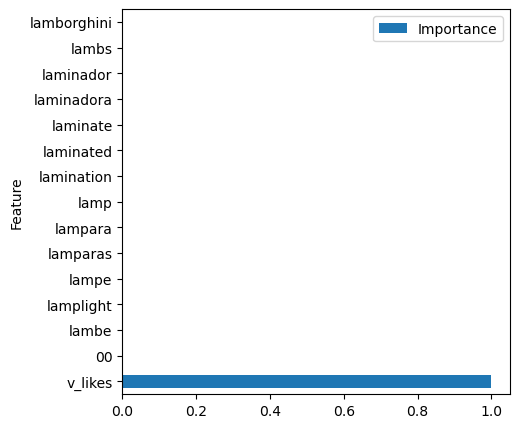

In [147]:

importance_dfr.nlargest(15, columns='Importance').plot(
    kind='barh', 
    figsize=(5, 5),
    x='Feature',  # Make sure the 'feature' column is used for the x-axis
    y='Importance'  # And 'Importance' for the y-axis
)


In [148]:
# from sklearn.model_selection import RandomizedSearchCV

# param_grid = { 
#     'n_estimators': [25, 50, 100, 150], 
#     'max_features': ['sqrt', 'log2', None], 
#     'max_depth': [5,10,15,20,25], 
#     'max_leaf_nodes': [3, 6, 9,12], 
# } 

# random_search = RandomizedSearchCV(RandomForestClassifier(), 
#                                    param_grid) 
# random_search.fit(X_train_combined, y_train) 
# print(random_search.best_estimator_) 



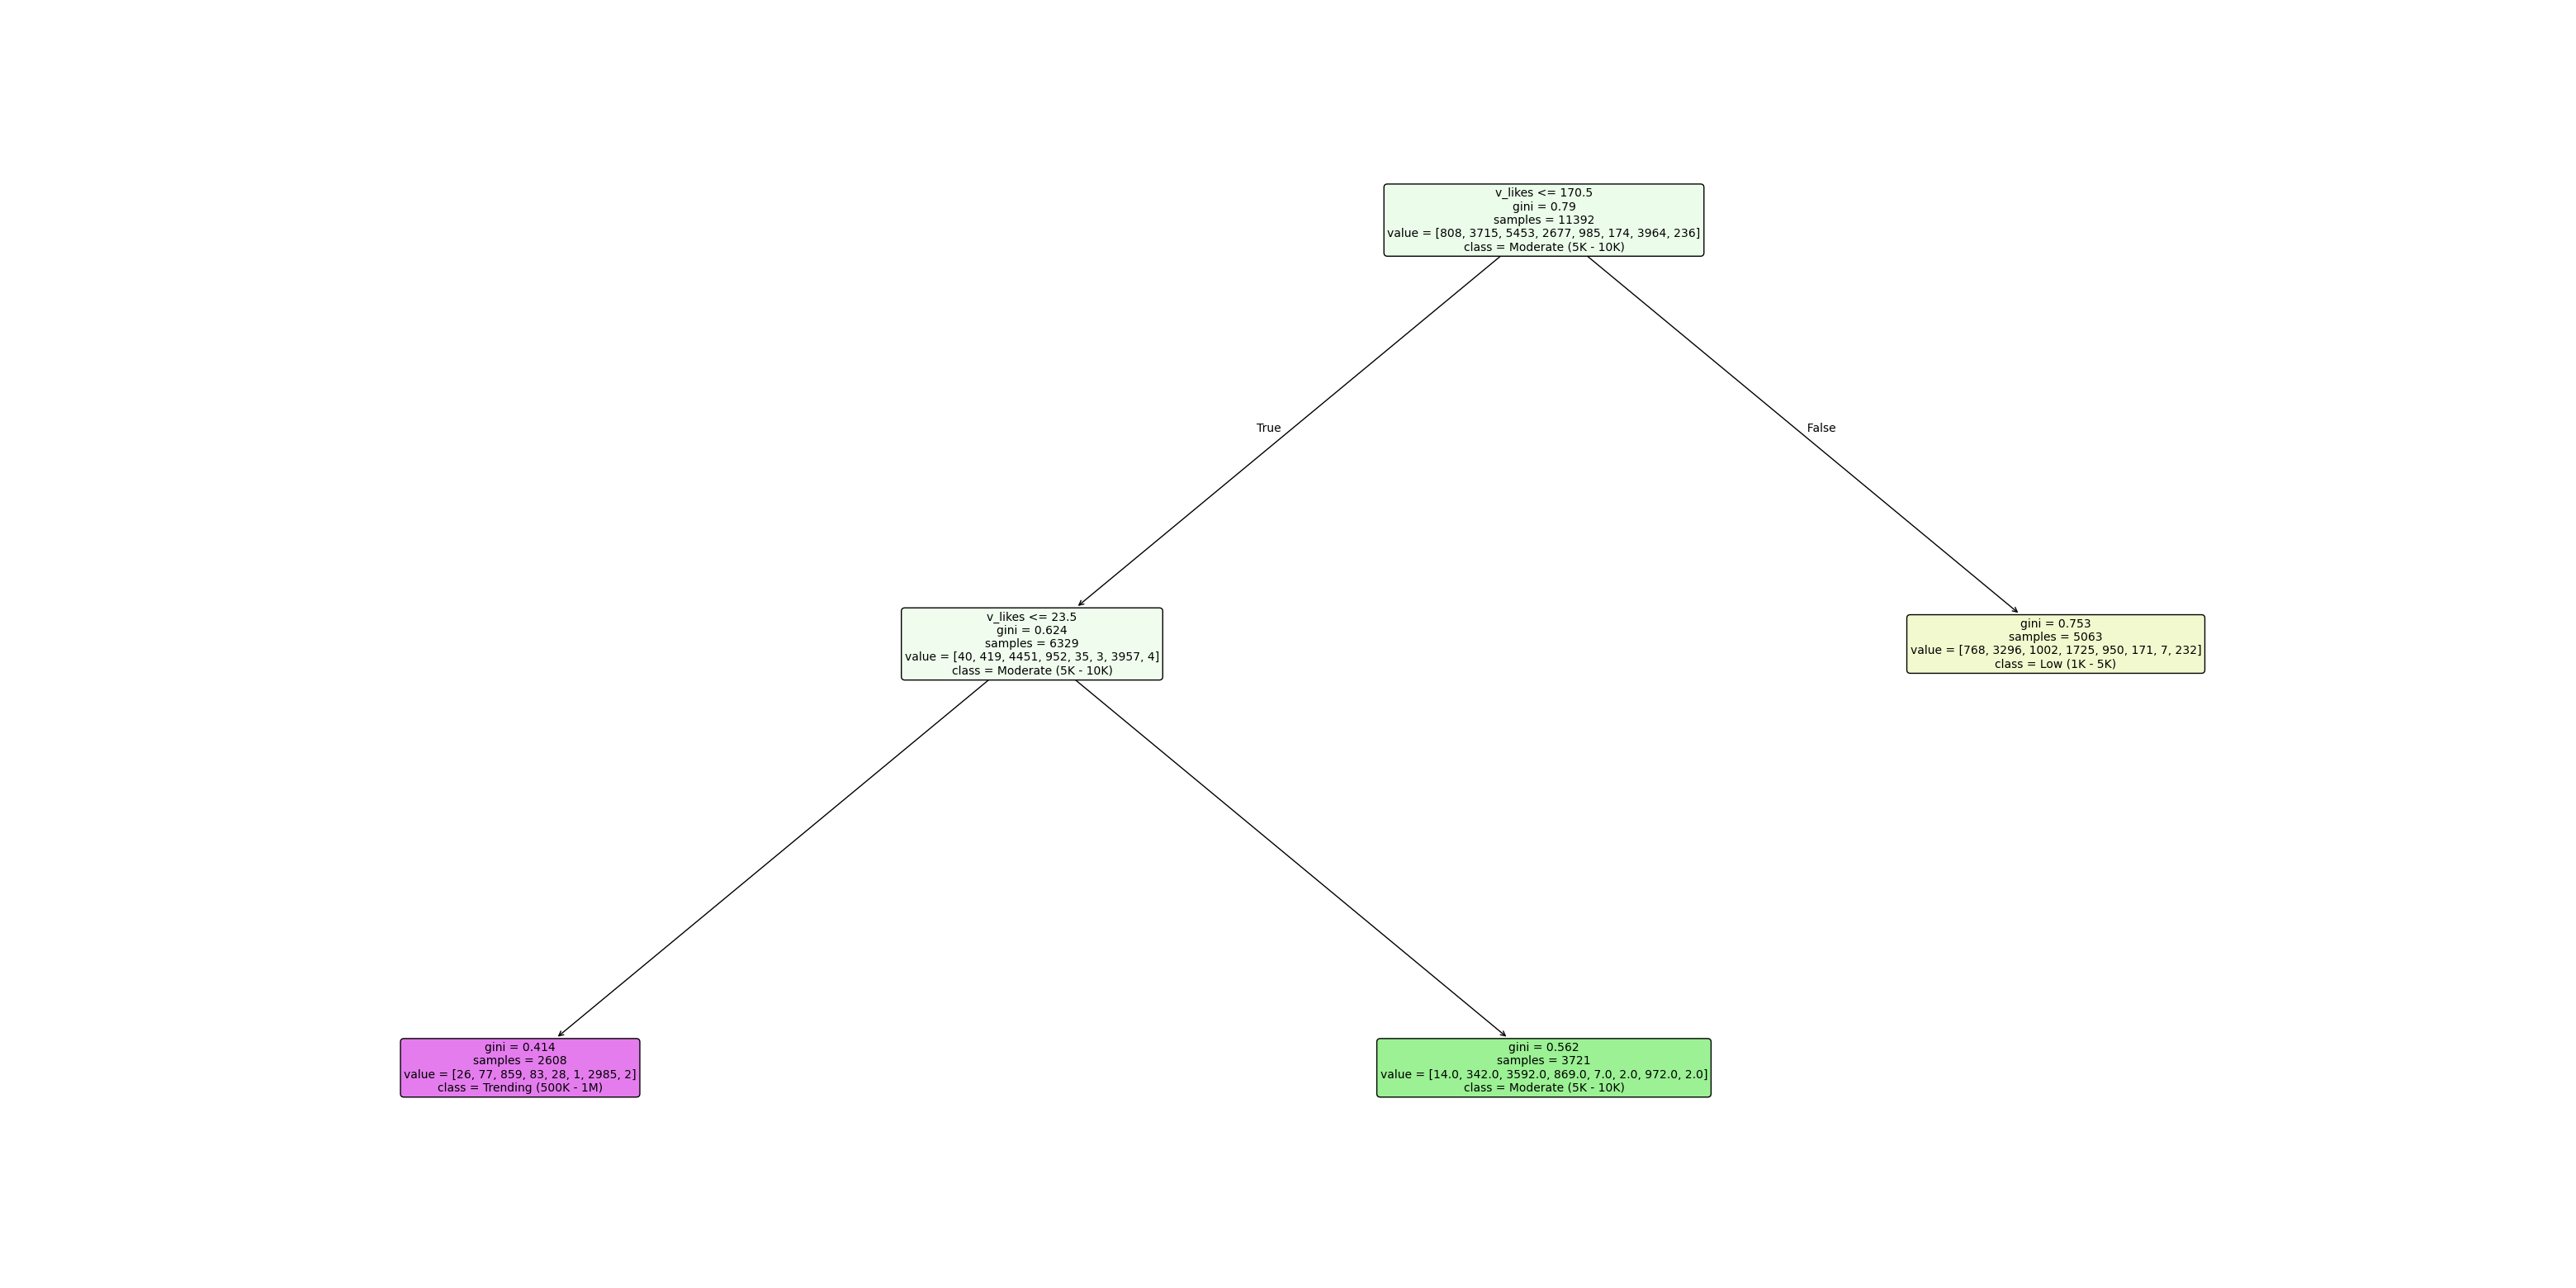

In [149]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(40, 20))
plot_tree(modelr.estimators_[8], 
          filled=True, 
          feature_names=l,  # Assuming X_train_combined is a DataFrame
          class_names= ["Very Low (0 - 1K)",
        "Low (1K - 5K)",
        "Moderate (5K - 10K)",
        "Growing (10K - 50K)",
        "Established (50K - 100K)",
        "Popular (100K - 500K)",
        "Trending (500K - 1M)",
        "Viral (1M+)"],  # Replace with actual class names
          rounded=True, 
          fontsize=10,
          max_depth=4)
plt.show()

# XGBOOST

In [150]:
import  xgboost

modelx = xgboost.XGBClassifier(random_state = 42, 
                               subsample = 0.5, 
                               n_estimators = 100, 
                               max_depth = 15, 
                               learning_rate = 0.1)

# Best hyperparameters: {'subsample': 0.5, 'n_estimators': 100, 'max_depth': 15, 'learning_rate': 0.1}
modelx.fit(X_train_combined, y_train)

y_pred = modelx.predict(X_test_combined)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.3f}%")


Accuracy: 75.155%


In [151]:

feature_importances = modelx.feature_importances_

importance_dfx = pd.DataFrame({'Feature': l, 'Importance': feature_importances})
importance_dfx = importance_dfx.sort_values(by='Importance', ascending=False)
importance_dfx.head(15)



,Feature,Importance
3753,CryptocurrencyTips,0.006608
9346,Obras,0.004040
3751,CryptocurrencyEducation,0.003431
26036,retro,0.002432
33670,v_likes,0.002396
1275,AltcoinPicks,0.002185
9182,Nicki,0.002091
8902,Mrs,0.001986
16231,brother,0.001983
29665,winner,0.001949


<Axes: ylabel='Feature'>

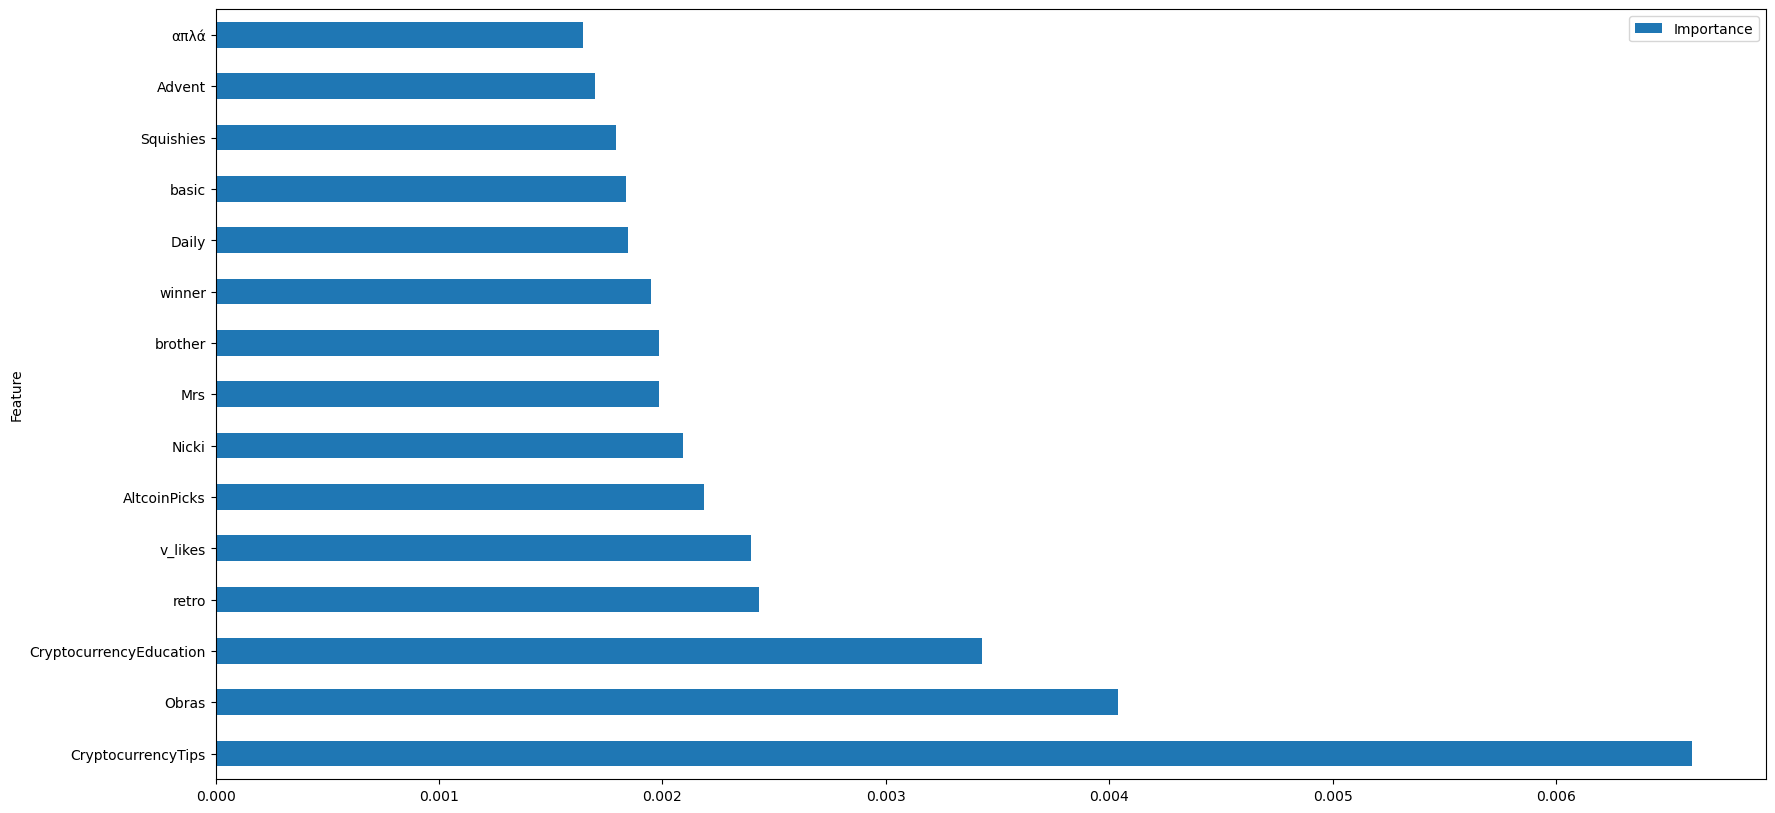

In [152]:

importance_dfx.nlargest(15, columns='Importance').plot(
    kind='barh', 
    figsize=(20, 10),
    x='Feature',  # Make sure the 'feature' column is used for the x-axis
    y='Importance'  # And 'Importance' for the y-axis
)

In [153]:
# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np


# # Define the parameter distribution
# param_dist = {
#     # 'max_depth': (3, 10, 15),
#     'max_depth': (10, 15, 20, 25),
#     # 'learning_rate': (0.01, 0.1, 0.15),
#     'learning_rate': (0.1, 0.15),
#     'subsample': (0.5, 0.5),
#     'n_estimators':(50, 100, 150)
# }

# # Set up RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=xgboost.XGBClassifier(random_state =42), param_distributions=param_dist, n_iter=100, scoring='accuracy', cv=3, random_state=42)

# # Fit RandomizedSearchCV
# random_search.fit(X_train_combined, y_train)

# # Get the best parameters
# print("Best hyperparameters:", random_search.best_params_)


In [154]:
# y_pred = modelr.predict(X_test_combined)

In [155]:
#r2 = r2_score(y_test, y_pred)
#print(f"R² Score: {r2}")

In [156]:
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy*100:.3f}%")

# feature_importances = modelr.feature_importances_

# importance_df = pd.DataFrame({'Feature': l, 'Importance': feature_importances})
# importance_df = importance_df.sort_values(by='Importance', ascending=False)
# importance_df.head(35)

# DECISION TREE

In [157]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

modeld = DecisionTreeClassifier(
    random_state=42,
    min_samples_split=10,
    min_samples_leaf=1,
    max_depth=10,
    criterion='gini'
)

# Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini'}

# Step 6: Fit the Model
modeld.fit(X_train_combined, y_train)

# Step 7: Make Predictions
y_pred = modeld.predict(X_test_combined)

# Step 8: Evaluate the Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Confusion Matrix:
 [[  89   79    3    3   27    1    0    0]
 [  36  701   51  104    5    0    5    0]
 [   1   36 1081   99    0    0  171    0]
 [   1  168  189  284    0    0    4    0]
 [  41   32    1    0  170   15    1    2]
 [   2    1    0    0   13   16    0    4]
 [   0    0  148    1    0    0  863    0]
 [   0    0    0    0    6   20    0   30]]
Accuracy Score: 0.7180284191829485
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.44      0.48       202
           1       0.69      0.78      0.73       902
           2       0.73      0.78      0.76      1388
           3       0.58      0.44      0.50       646
           4       0.77      0.65      0.70       262
           5       0.31      0.44      0.36        36
           6       0.83      0.85      0.84      1012
           7       0.83      0.54      0.65        56

    accuracy                           0.72      4504
   macro avg       0.66      0.61  

In [158]:
feature_importances = modeld.feature_importances_

importance_dfd = pd.DataFrame({'Feature': l, 'Importance': feature_importances})
importance_dfd = importance_dfd.sort_values(by='Importance', ascending=False)
importance_dfd.head(15)


,Feature,Importance
33670,v_likes,0.610409
33668,c_channel_viewCount,0.127833
33666,c_channel_subCount,0.036827
33669,v_comment_count,0.030452
33667,c_channel_videoCount,0.029547
33677,v_duration_time,0.024256
33676,v_second,0.004853
33675,v_minute,0.004289
33672,v_month,0.004261
33680,v_category_id_Entertainment,0.004112


<Axes: ylabel='Feature'>

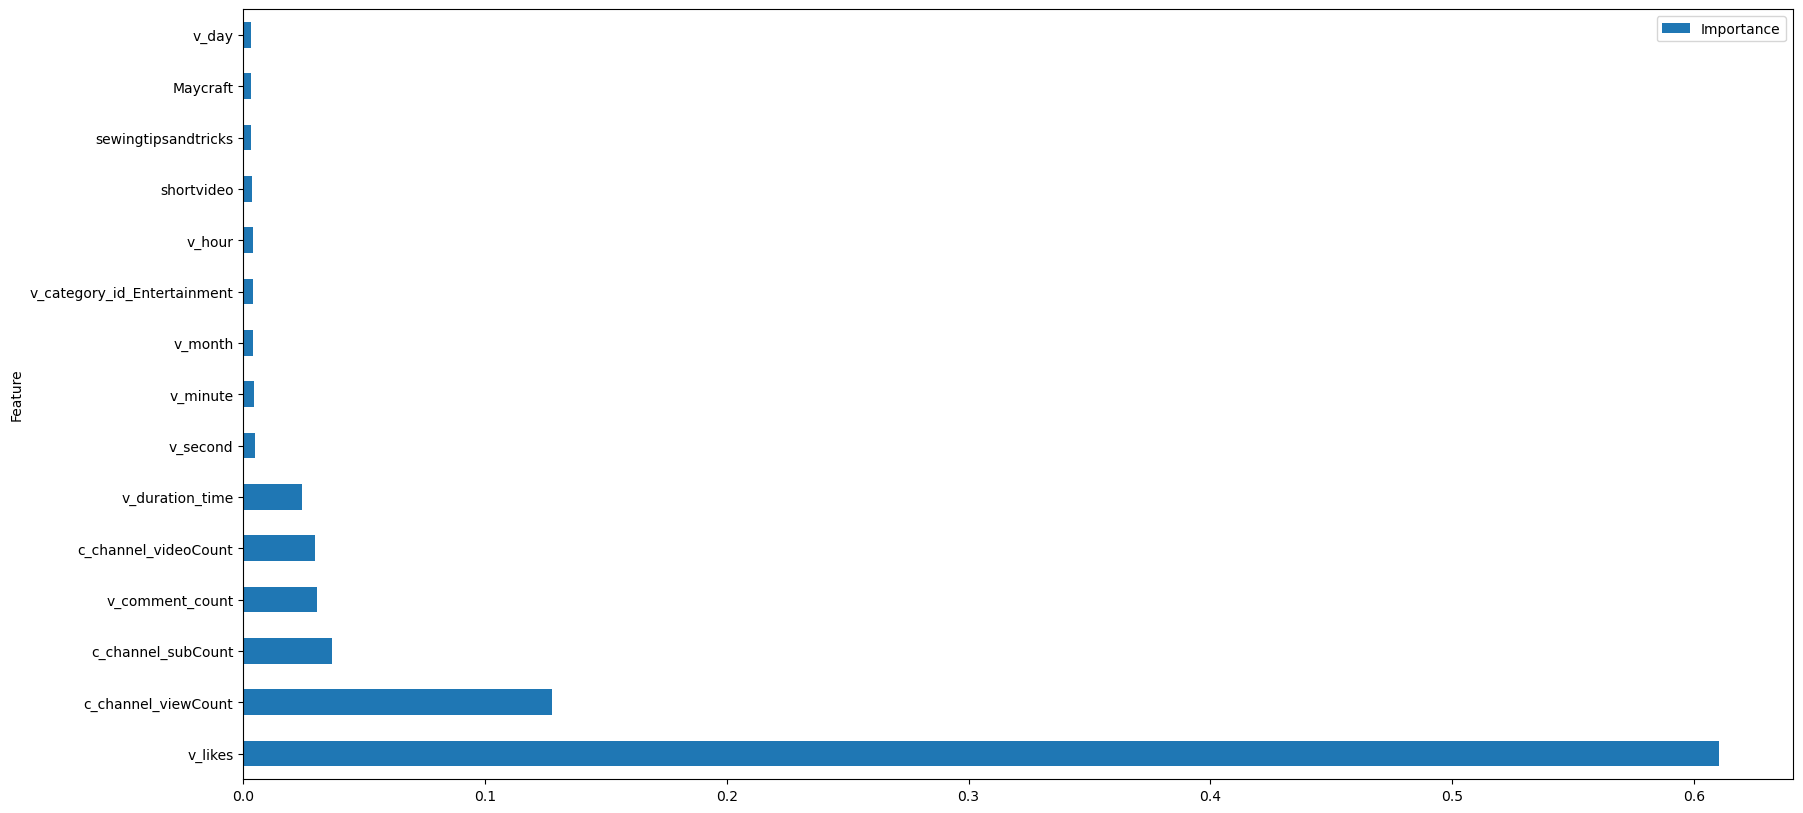

In [159]:
importance_dfd.nlargest(15, columns='Importance').plot(
    kind='barh', 
    figsize=(20, 10),
    x='Feature',  # Make sure the 'feature' column is used for the x-axis
    y='Importance'  # And 'Importance' for the y-axis
)

In [160]:

# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np


# modeld = DecisionTreeClassifier(random_state=42)

# X = X_train_combined
# y = y_train


# # Define the parameter distribution
# param_dist = {
#     'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
#     'max_depth': (5,10,15,20, 25),  # Maximum depth of the tree
#     'min_samples_split': (2, 6, 10, 14),  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': (1,3,6,9,12),  # Minimum number of samples required to be at a leaf node
# }

# # Create a RandomizedSearchCV object
# random_search = RandomizedSearchCV(estimator=modeld, param_distributions=param_dist, 
#                                    n_iter=100, scoring='accuracy', cv=5, 
#                                    n_jobs=-1, verbose=2, random_state=42)

# # Fit the model
# random_search.fit(X, y)

# # Get the best parameters and best score
# best_params = random_search.best_params_
# best_score = random_search.best_score_

# print(f"Best Parameters: {best_params}")
# print(f"Best Cross-Validation Score: {best_score}")



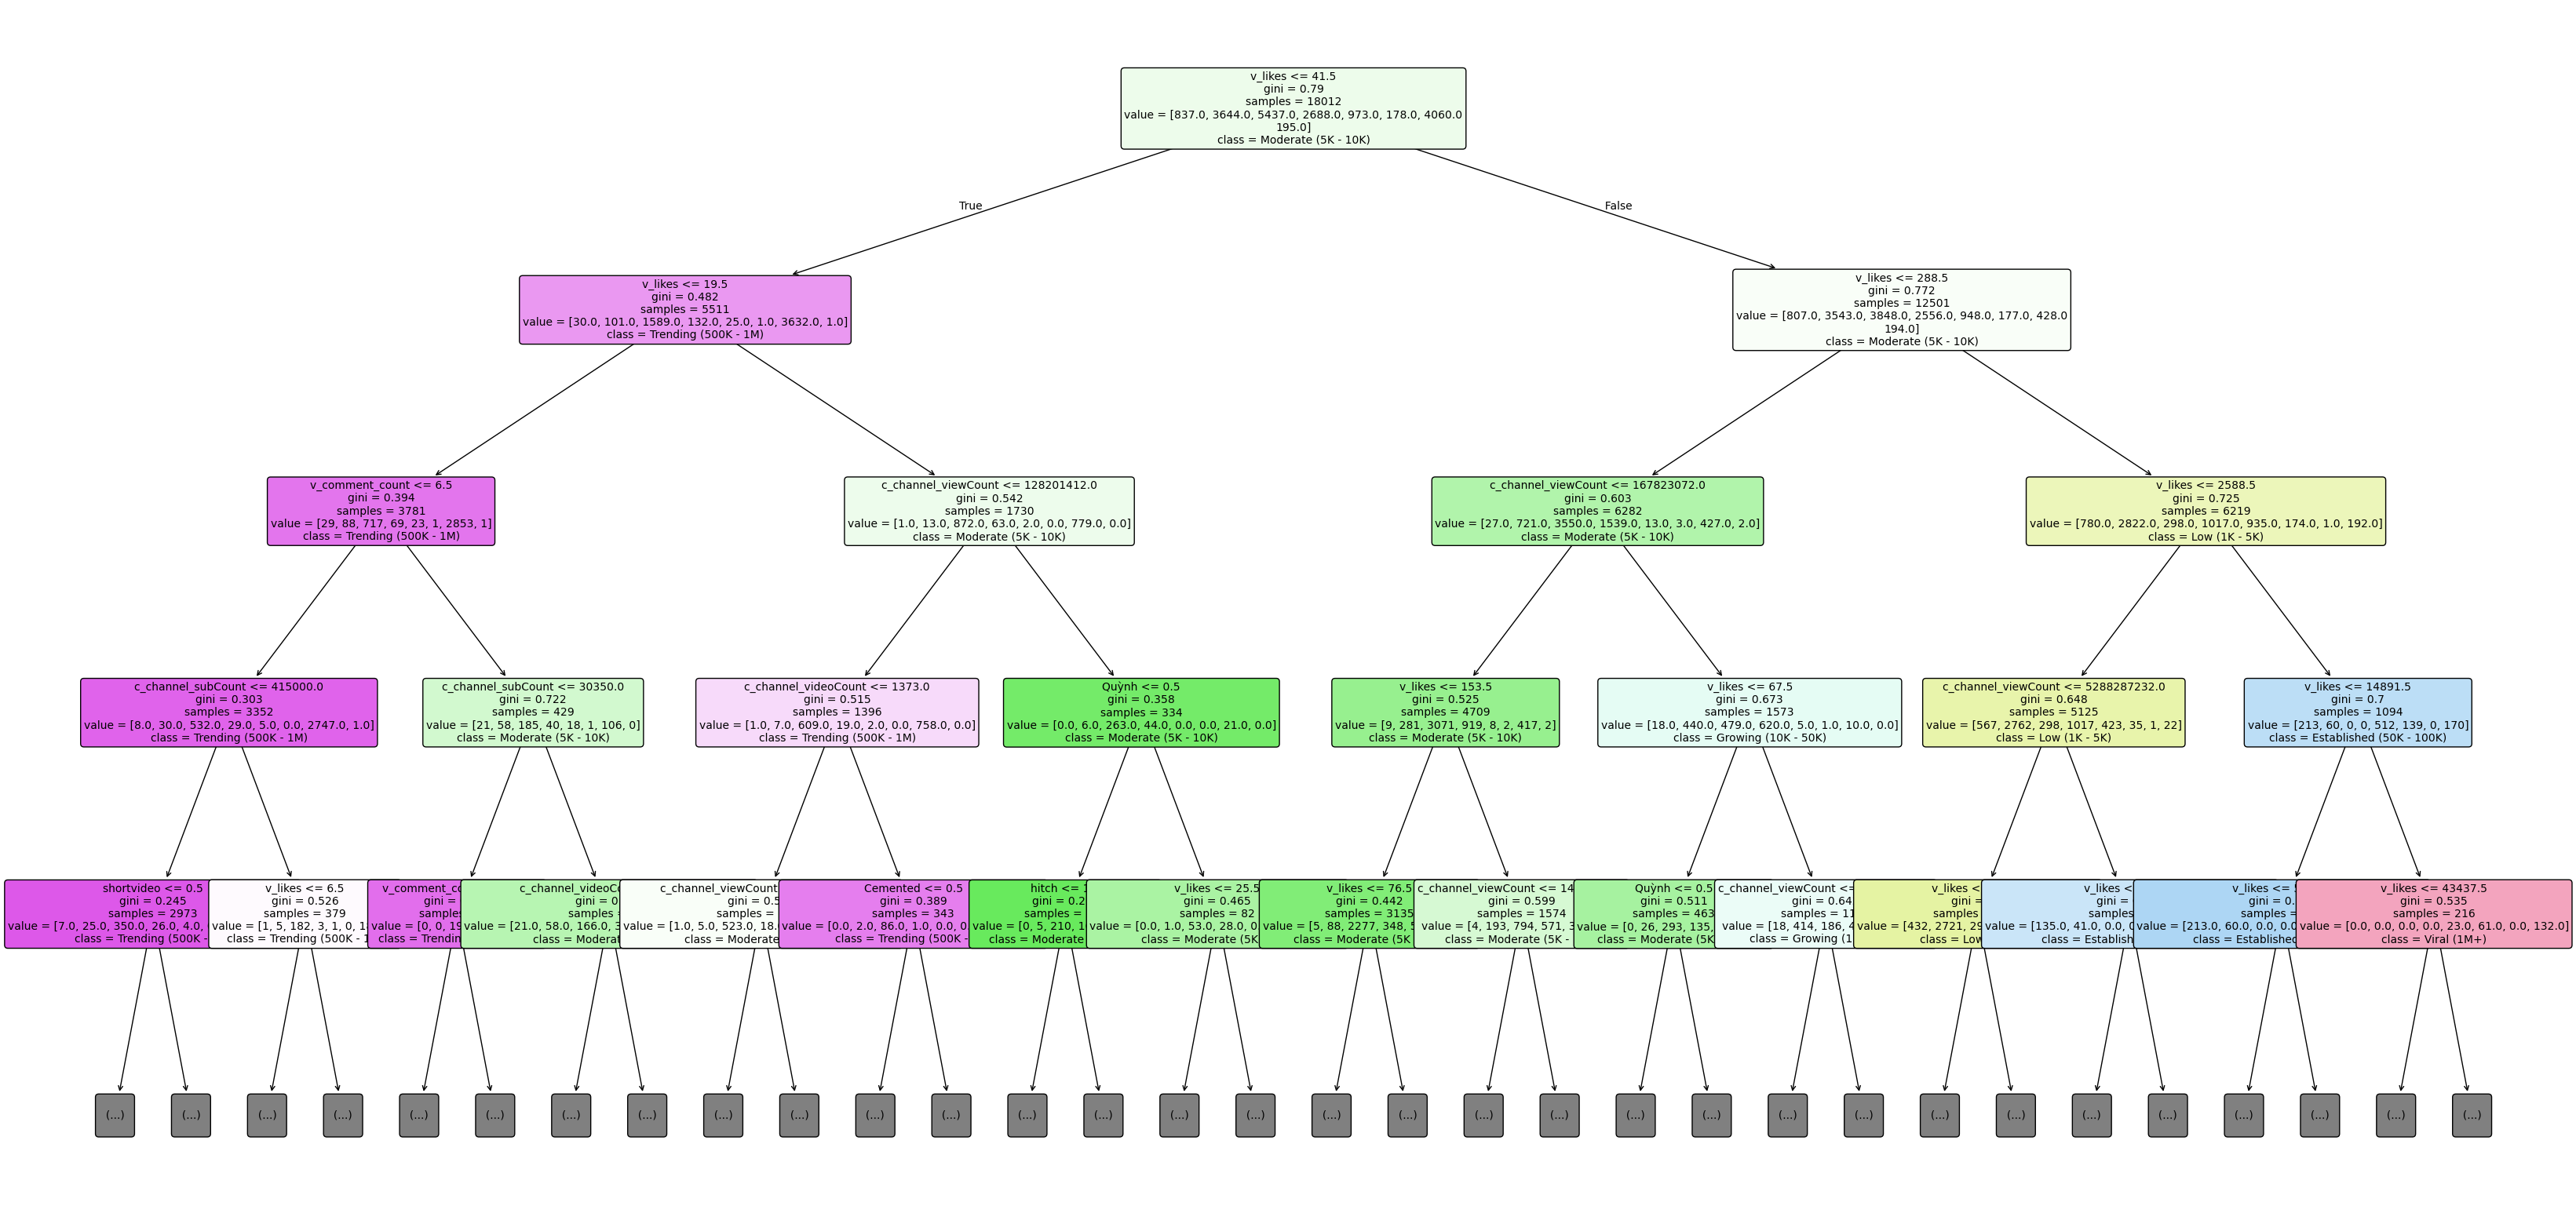

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Plot the decision tree
plt.figure(figsize=(40, 20))
plot_tree(modeld, 
          filled=True, 
          feature_names=l,  # Assuming X_train_combined is a DataFrame
          class_names= ["Very Low (0 - 1K)",
        "Low (1K - 5K)",
        "Moderate (5K - 10K)",
        "Growing (10K - 50K)",
        "Established (50K - 100K)",
        "Popular (100K - 500K)",
        "Trending (500K - 1M)",
        "Viral (1M+)"],  # Replace with actual class names
          rounded=True, 
          fontsize=10,
          max_depth=4)
plt.show()

